# How can we improve accuracy for models by tuning Hyperparameters?

Index(['# `rec_id`', ' `url`', ' `website`', ' `result`', ' `created_date` '], dtype='object')
Model: ExtraTreeClassifier
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      3703
           1       0.83      0.78      0.81      2279

    accuracy                           0.86      5982
   macro avg       0.85      0.84      0.85      5982
weighted avg       0.86      0.86      0.86      5982



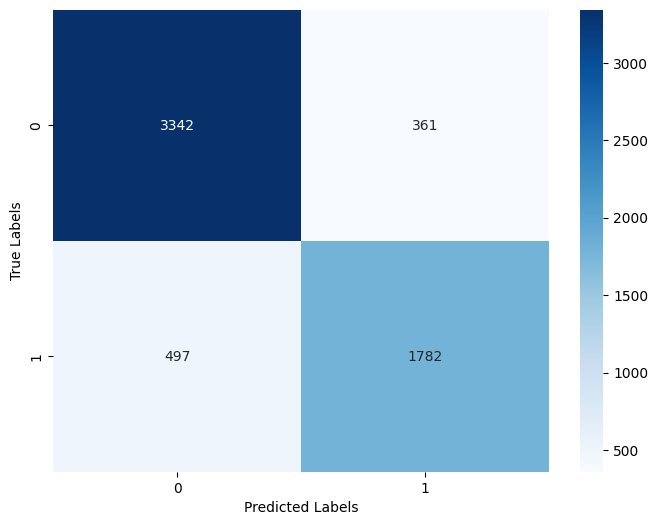

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score: 0.88


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import ExtraTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# Load your dataset
website_df = pd.read_csv("data.csv", on_bad_lines='skip')
print(website_df.columns)
# Clean up the data
website_df = website_df.drop(columns=['# `rec_id`', ' `website`', ' `created_date` '])
website_df = website_df.rename(columns={' `url`': 'website_url', ' `result`': 'result'})
website_df = website_df[~website_df['result'].astype(str).str.contains('result', case=False)]


# Only use a quarter of the data
sample_size = int(0.25 * len(website_df))
website_df = website_df.sample(sample_size, random_state=42)

# Split data into training and testing sets
X = website_df[['website_url']]
y = website_df['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['website_url'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['website_url'])

# Train and evaluate Extra Trees Classifier
et_model = ExtraTreeClassifier()
et_model.fit(X_train_tfidf, y_train)
y_pred = et_model.predict(X_test_tfidf)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Model: {et_model.__class__.__name__}')
print(f'Accuracy: {accuracy:.2f}')
print(report)


# Model tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(et_model, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_tfidf, y_train)

# Print the best parameters and the best score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_:.2f}')



# Tuning Hyperparameters for DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_tfidf, y_train)

# Print the best parameters and the best score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_:.2f}')


Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score: 0.89


# Without hyperparameter Grid Search Optimization

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import ExtraTreeClassifier,DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# Load your dataset
website_df = pd.read_csv("data.csv", on_bad_lines='skip')
# Clean up the data
website_df = website_df.drop(columns=['# `rec_id`', ' `website`', ' `created_date` '])
website_df = website_df.rename(columns={' `url`': 'website_url', ' `result`': 'result'})
website_df = website_df[~website_df['result'].astype(str).str.contains('result', case=False)]


# Only use a quarter of the data
sample_size = int(0.25 * len(website_df))
website_df = website_df.sample(sample_size, random_state=42)

# Split data into training and testing sets
X = website_df[['website_url']]
y = website_df['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['website_url'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['website_url'])

# Train and evaluate Extra Trees Classifier
et_model = ExtraTreeClassifier()
et_model.fit(X_train_tfidf, y_train)
y_pred = et_model.predict(X_test_tfidf)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Model: {et_model.__class__.__name__}')
print(f'Accuracy: {accuracy:.2f}')
print(report)


Model: ExtraTreeClassifier
Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      3703
           1       0.80      0.79      0.79      2279

    accuracy                           0.84      5982
   macro avg       0.84      0.83      0.83      5982
weighted avg       0.84      0.84      0.84      5982



In [ ]:
# Train and evaluate Extra Trees Classifier
et_model = ExtraTreeClassifier()
et_model.fit(X_train_tfidf, y_train)
y_pred = et_model.predict(X_test_tfidf)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Model: {et_model.__class__.__name__}')
print(f'Accuracy: {accuracy:.2f}')
print(report)

Model: ExtraTreeClassifier
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      3703
           1       0.84      0.79      0.81      2279

    accuracy                           0.86      5982
   macro avg       0.86      0.85      0.85      5982
weighted avg       0.86      0.86      0.86      5982

